<a href="https://colab.research.google.com/github/Aayushi-Sharma24/Online_Retail_Customer_Segmentation_Unsupervised/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

##Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#populate the dataframe
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Projects -Draft/unsupervised /Online Retail.xlsx")

###Let's Explore the data

In [4]:
#First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#check shape
df.shape

(541909, 8)



*   Rows = 5,41,909
*   Columns = 8



In [6]:
#check column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#check statistical aspects of dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products bought: ", df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique())
print('Number of countries: ', df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Number of countries:  38


##Let's check for Missing values in the dataset

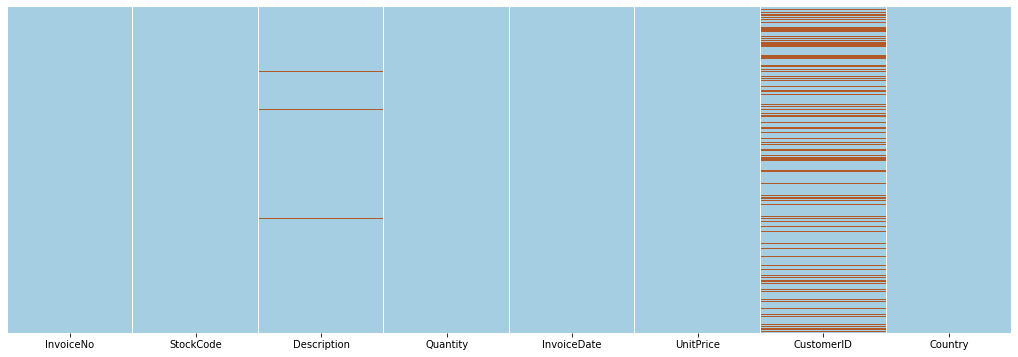

In [10]:
# check for Null values
plt.rcParams['figure.figsize'] = (18, 6)
sns.heatmap(df.isnull(), cbar=False,yticklabels=False,cmap='Paired')

In [11]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

**CustomerId** and **Description** features have null values

##Let's check for Duplicated data

In [12]:
# check for duplicate rows
df.duplicated().sum()

5268

There are 5268 duplicated rows in our dataset. We will drop these duplicated rows

In [13]:
# Dropping Duplicate Rows
df=df.drop_duplicates()

###Let's check the missing values again after dropping duplicated rows

In [14]:
#check null values
df.isnull().sum().sort_values(ascending=False)

CustomerID     135037
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

##Exploratory Data Analysis

###Top 10 countries based on orders

Text(0.5, 1.0, 'top 10 countries based on orders')

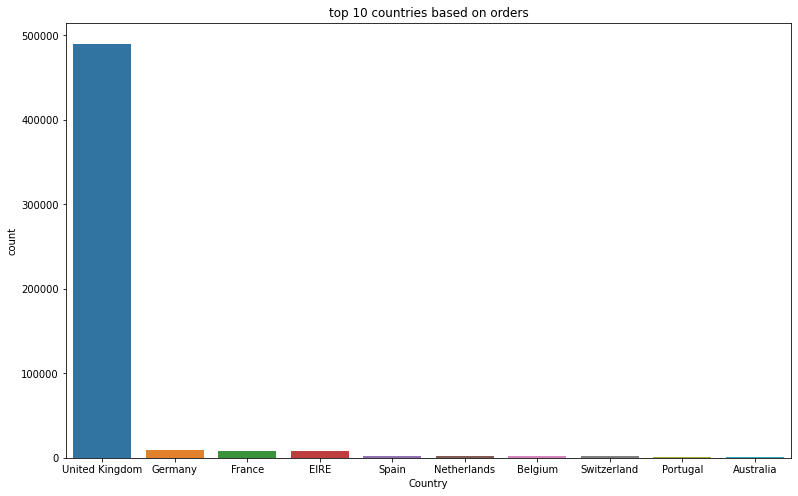

In [15]:
#Plotting data using countplot
plt.figure(figsize=(13,8))
sns.countplot(x='Country', data=df, order=df.Country.value_counts().iloc[:10].index)
plt.title("top 10 countries based on orders")

####Maximum orders are recieved from United Kingdom

###Bottom 5 Countries based on orders

Text(0.5, 1.0, 'Least 5 countries based on orders')

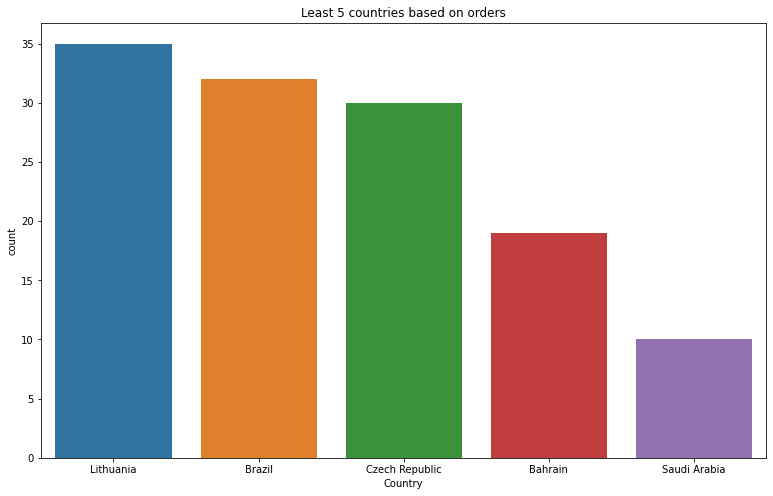

In [16]:
#Plotting data using countplot
plt.figure(figsize=(13,8))
sns.countplot(x='Country', data=df, order=df.Country.value_counts().iloc[33:].index)
plt.title("Least 5 countries based on orders")

Least number of Orders are from Saudi Arabia

###Let's find out Top 5 Product name

In [17]:
#Extracting description data in a dataframe
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2357
1,REGENCY CAKESTAND 3 TIER,2189
2,JUMBO BAG RED RETROSPOT,2156
3,PARTY BUNTING,1720
4,LUNCH BAG RED RETROSPOT,1625


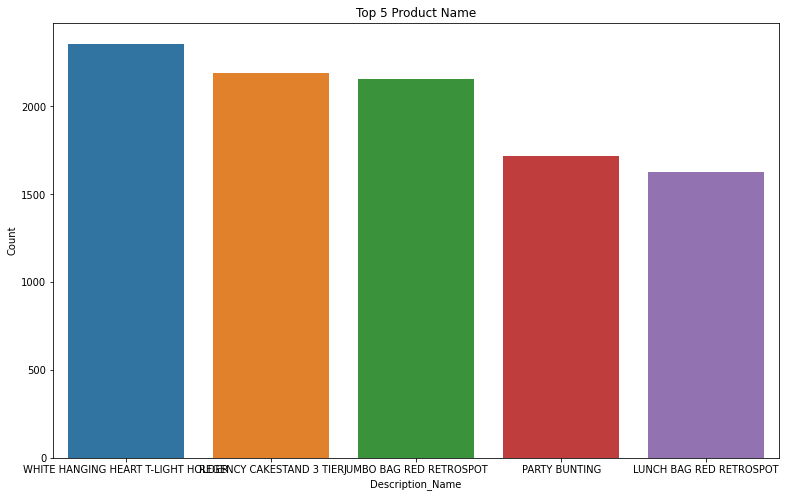

In [19]:
#Plotting data using barplot
plt.figure(figsize=(13,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

###Let's Explore Stock Name

In [20]:
#Extracting StockCode data in a dataframe
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2301
1,22423,2192
2,85099B,2156
3,47566,1720
4,20725,1626


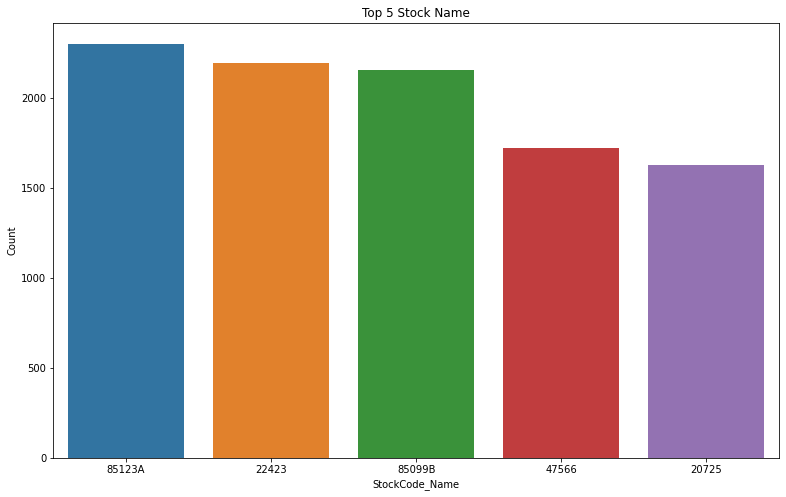

In [21]:
#Plotting data using barplot
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

###Overview of Quantity column

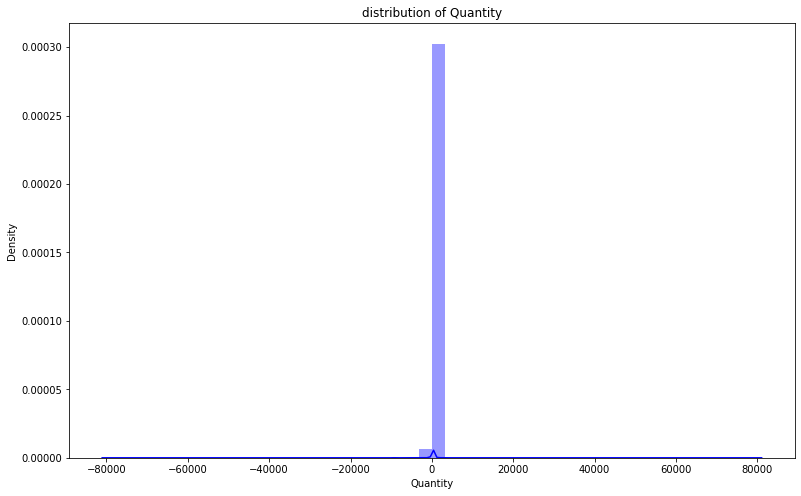

In [22]:
#distribution of Quantity
plt.figure(figsize=(13,8))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

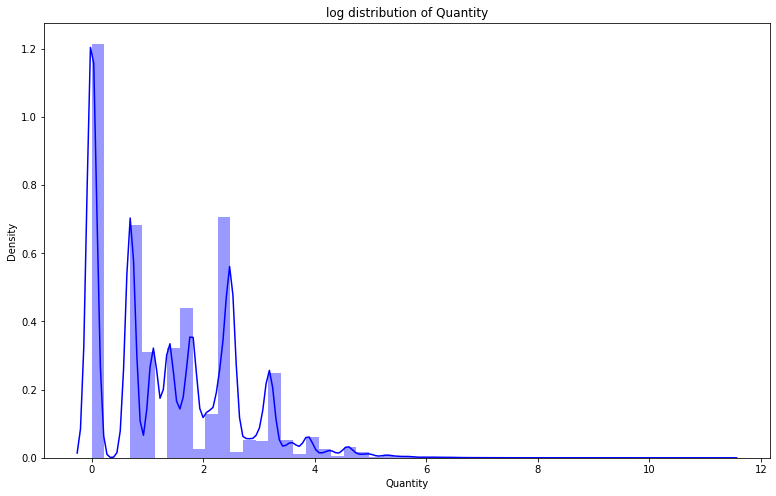

In [23]:
#log distribution of Quantity
plt.figure(figsize=(13,8))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

###Overview of Unit Price

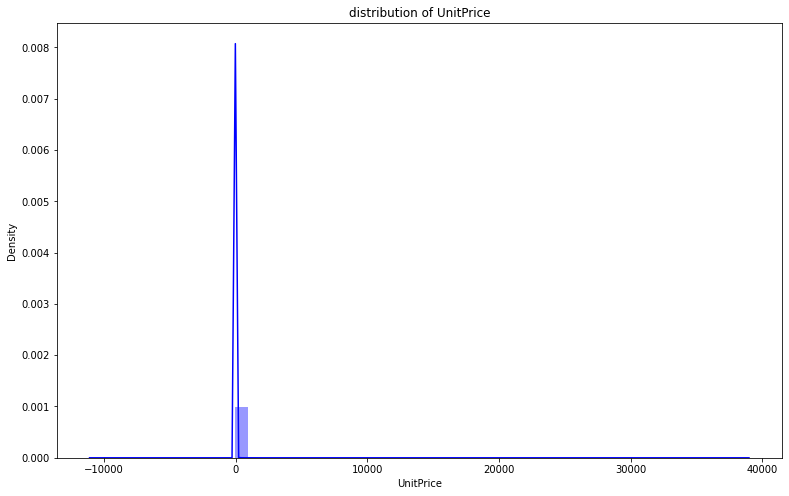

In [24]:
#distribution of UnitPrice
plt.figure(figsize=(13,8))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

### What's the average number of unqiue items per order and per customer?

In [25]:
#extracting unique items per order 
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

,Number of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [26]:
#statistical analysis
groupby_invoice.describe()

,Number of Items per Order
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [27]:
#extracting unique items per customer 
groupby_ID = pd.DataFrame(df.groupby('CustomerID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17


In [28]:
#statistical analysis
groupby_ID.describe()

,Number of Items per Customer
count,4372.000000
mean,61.211116
std,85.425119
min,1.000000
25%,15.000000
50%,35.000000
75%,77.000000
max,1794.000000


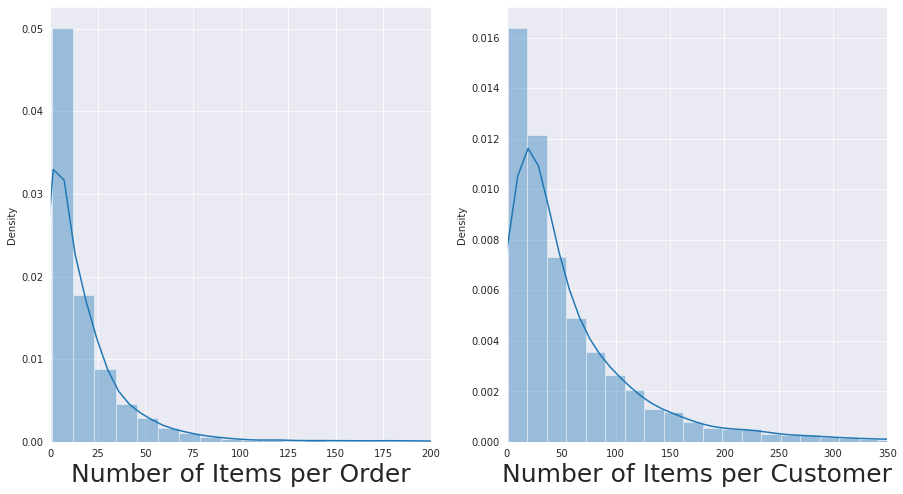

In [29]:
#Visualize the distribution of both
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 8)
plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

We have skewed left distributions for both plots. The average number of items per order is 20.5 and the average number of items per customer is 60

###How many orders were cancelled?

In [30]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
print("There were", len(cancelled_orders), "cancelled orders.")

#Calculate the percentage of cancellations by dividing the cancelled orders by the total orders
total_orders = df['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9251 cancelled orders.
Percentage of orders cancelled: 35.72% 


##Feature Engineering

###Null value Treatment

####Applying Most frequent catergory imputation on Description feature

In [31]:
def impute_nan(df,variable):
  most_frequent_category=df[variable].mode()[0]
  df[variable].fillna(most_frequent_category,inplace=True)

In [32]:
impute_nan(df,"Description")

####Applying Random sample imputation on CustomerID

In [33]:
def impute_nan_numeric(df,variable):
  df[variable+'_random']=df[variable]
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index= df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [34]:
impute_nan_numeric(df,'CustomerID')
df.drop(['CustomerID'],axis=1,inplace=True)

In [35]:
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
Country              0
CustomerID_random    0
dtype: int64

###Outlier Treatment

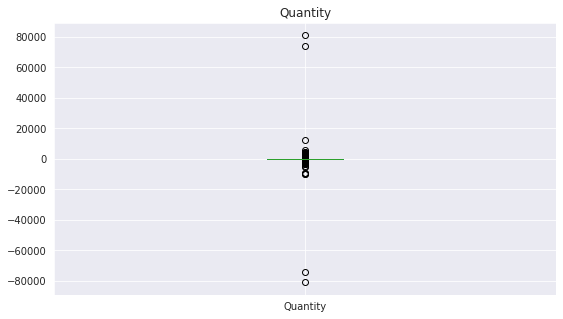

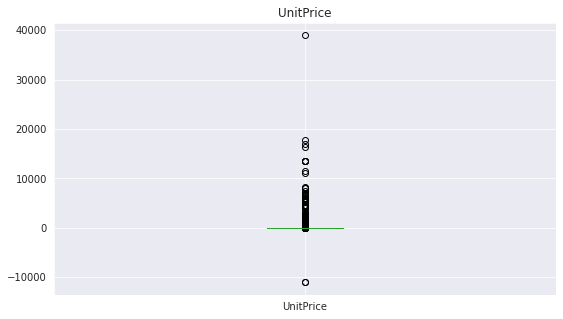

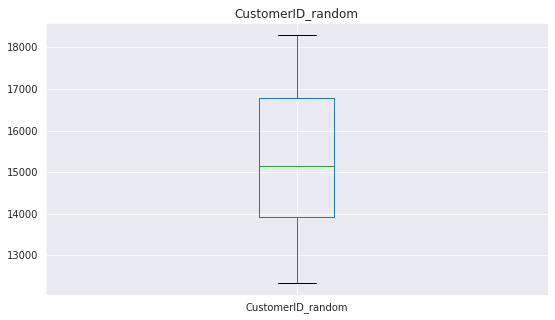

In [36]:
#Plotting boxplot for all numeric columns to check outliers

numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
for col in numerical_features[:]:
    fig = plt.figure(figsize=(9, 5))
    ax = fig.gca()
    df.boxplot(column=col) 
    ax.set_title(col)
plt.show()

**Quantity** and **UnitPrice** have outliers

In [37]:
#Performing outlier treatment using IQR method
for i in ['Quantity','UnitPrice']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

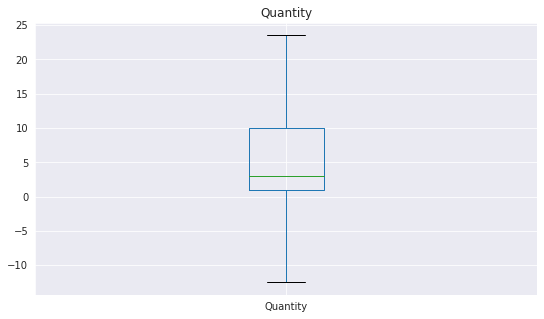

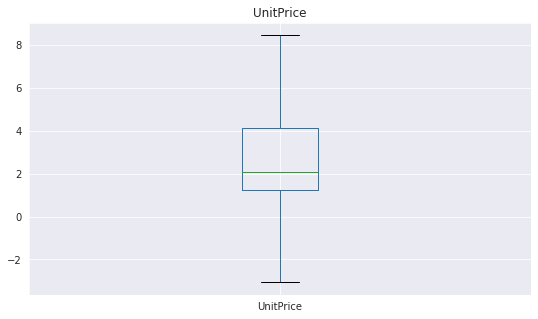

In [39]:
#Check for outliers again
for i in ['Quantity','UnitPrice']:
    fig = plt.figure(figsize=(9, 5))
    ax = fig.gca()
    df.boxplot(column=i) 
    ax.set_title(i)
plt.show()

##RFM Analysis

In [41]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt
df['TotalAmount']=df['Quantity']*df['UnitPrice']
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID_random').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID_random,Recency,Frequency,Monetary
0,12346.0,325,2,11.440
1,12347.0,0,242,4341.250
2,12348.0,9,41,593.720
3,12349.0,3,100,1632.375
4,12350.0,135,21,329.645


In [42]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4372.000000
mean       23.470037
std        53.603259
min         0.000000
25%         1.000000
50%         4.000000
75%        18.000000
max       373.000000
Name: Recency, dtype: float64

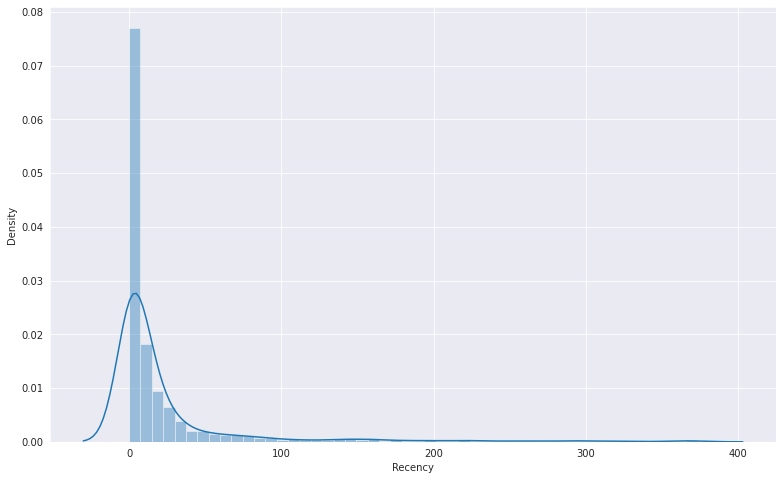

In [43]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [44]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count     4372.000000
mean       122.744968
std        305.322658
min          1.000000
25%         23.000000
50%         55.000000
75%        134.000000
max      10385.000000
Name: Frequency, dtype: float64

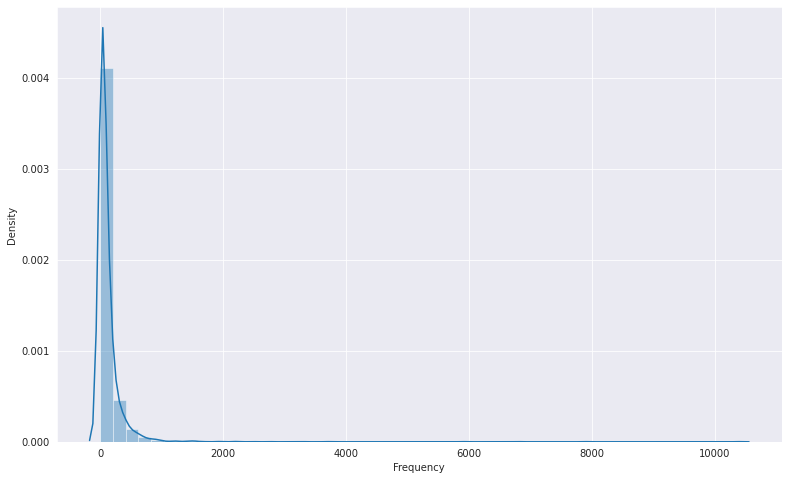

In [45]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [46]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4372.000000
mean       1591.682432
std        3848.892332
min        -425.185000
25%         308.757500
50%         687.935000
75%        1671.946250
max      127562.505000
Name: Monetary, dtype: float64

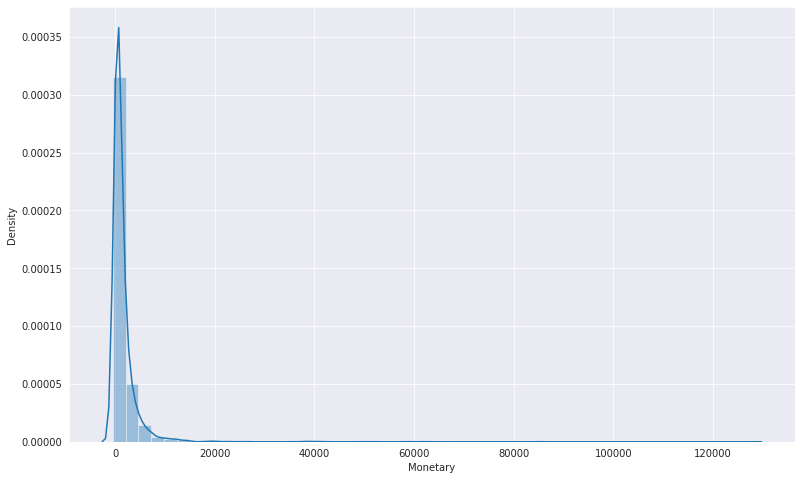

In [47]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

###RFM scoring

In [50]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 23.0, 0.5: 55.0, 0.75: 134.0},
 'Monetary': {0.25: 308.75750000000005, 0.5: 687.935, 0.75: 1671.94625},
 'Recency': {0.25: 1.0, 0.5: 4.0, 0.75: 18.0}}

In [48]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [51]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID_random,,,,,,
12346.0,325,2,11.440,4,4,4
12347.0,0,242,4341.250,1,1,1
12348.0,9,41,593.720,3,3,3
12349.0,3,100,1632.375,2,2,2
12350.0,135,21,329.645,4,4,3


In [52]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID_random,,,,,,,,
12346.0,325,2,11.440,4,4,4,444,12
12347.0,0,242,4341.250,1,1,1,111,3
12348.0,9,41,593.720,3,3,3,333,9
12349.0,3,100,1632.375,2,2,2,222,6
12350.0,135,21,329.645,4,4,3,443,11


In [53]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

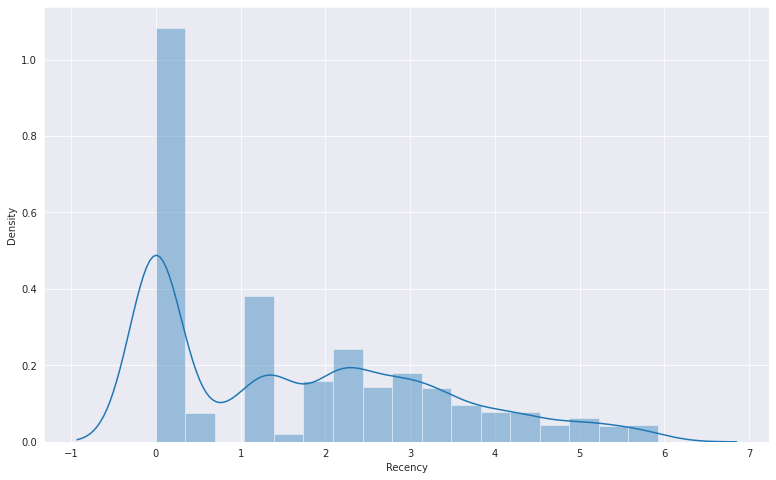

In [54]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

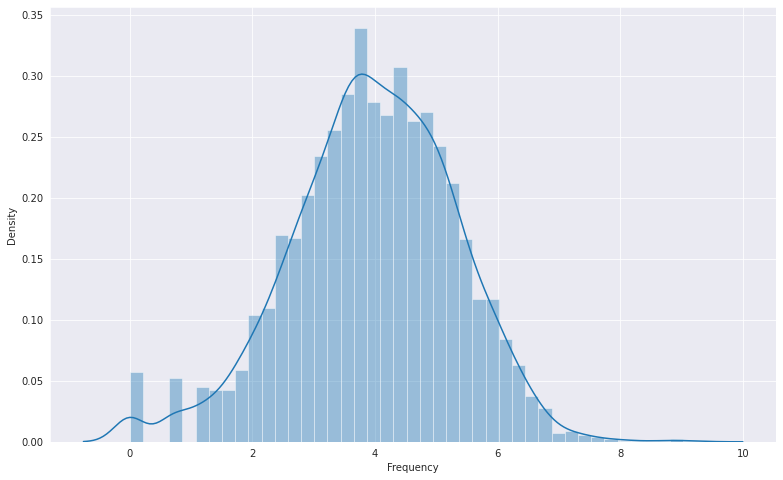

In [55]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

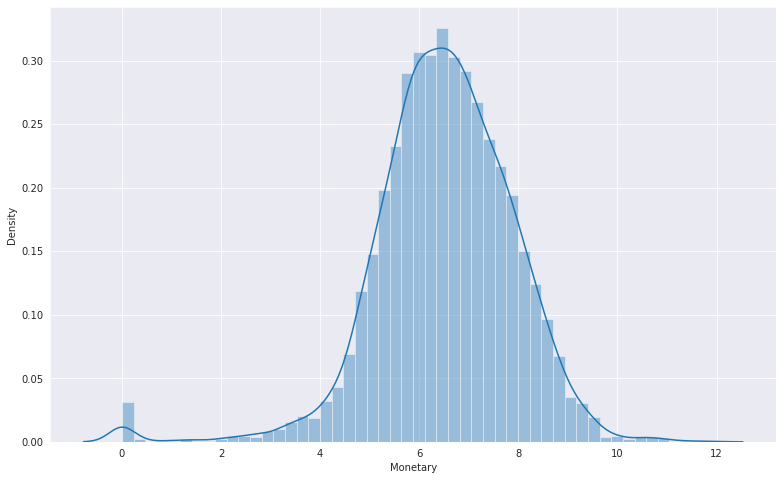

In [56]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [57]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)